Applicant Name : Reetika Chaturvedi <br>
Date: June 18,2021

## 1.a

In [1]:
def sumDigits(no): 
    return 0 if no == 0 else int(no % 10) + sumDigits(int(no / 10))  

def sum_of_multiples(left_limit,right_limit,mulitple_val):
  counter_ = 0
  stack_   = []
  result_ = []
  for i in range(left_limit,right_limit):
    if counter_ == mulitple_val:
       result_.append(stack_)
       stack_ = []
       counter_ = 0
    elif i % sumDigits(i) == 0:
      stack_.append(i)
      counter_ += 1
    else:
      stack_.clear()
      counter_ = 0 
  
  return result_

In [2]:
sum_of_multiples(100,1000,3)

[[110, 111, 112], [510, 511, 512]]

## 1.b

In [3]:
def sumDigits(no): 
    return 0 if no == 0 else int(no % 10) + sumDigits(int(no / 10)) 

def no_sum_of_multiples(left_limit,right_limit,mulitple_val):
  counter_ = 0
  stack_   = []
  result_ = []
  for i in range(left_limit,right_limit):
    if counter_ == mulitple_val:
       result_.append(stack_)
       stack_ = []
       counter_ = 0
    elif i % sumDigits(i) != 0:
      stack_.append(i)
      counter_ += 1
    else:
      stack_.clear()
      counter_ = 0 
  
  return result_

In [4]:
no_sum_of_multiples(100,1000,17)

[[559,
  560,
  561,
  562,
  563,
  564,
  565,
  566,
  567,
  568,
  569,
  570,
  571,
  572,
  573,
  574,
  575],
 [667,
  668,
  669,
  670,
  671,
  672,
  673,
  674,
  675,
  676,
  677,
  678,
  679,
  680,
  681,
  682,
  683],
 [739,
  740,
  741,
  742,
  743,
  744,
  745,
  746,
  747,
  748,
  749,
  750,
  751,
  752,
  753,
  754,
  755],
 [847,
  848,
  849,
  850,
  851,
  852,
  853,
  854,
  855,
  856,
  857,
  858,
  859,
  860,
  861,
  862,
  863],
 [937,
  938,
  939,
  940,
  941,
  942,
  943,
  944,
  945,
  946,
  947,
  948,
  949,
  950,
  951,
  952,
  953],
 [973,
  974,
  975,
  976,
  977,
  978,
  979,
  980,
  981,
  982,
  983,
  984,
  985,
  986,
  987,
  988,
  989]]

In [5]:
no_sum_of_multiples(100,1000,18)

[]

## 1.C

### Python packages to test the performance of the script:<br>

1. time_it
2. line_profiler
3. resource
4. memory_profiler

### Phoneme Dataset Analysis

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#Please input the path to the data file here
data = pd.read_csv("/content/drive/MyDrive/Challenge/Challenge/phoneme.csv")
new_data = data.drop(columns=['row.names','speaker'])

In [8]:
new_data.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,...,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g
0,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,11.38065,11.61545,10.31166,12.14300,10.65254,11.19395,11.27878,11.13465,11.82706,12.81048,12.32239,10.27542,9.57760,10.62308,11.34983,11.58342,12.19465,10.67933,9.95300,11.47047,11.74805,11.28167,11.51648,12.50765,12.10918,11.97849,10.80743,9.65682,10.71985,9.50841,...,12.29207,12.57110,10.00457,12.09898,14.08718,13.97254,11.74888,13.23555,13.76750,13.53994,12.28767,13.48164,13.43467,11.43232,11.01716,13.02529,13.37422,7.72797,12.32757,13.37041,12.68903,13.41566,13.16755,13.62844,13.32554,12.46720,13.84955,10.83688,11.23451,13.19359,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh
1,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,18.84739,19.35436,19.61419,20.32628,21.41752,20.14227,17.97866,16.32943,17.63076,16.51955,15.95348,16.77282,16.98819,18.32396,17.59234,15.94519,13.31152,15.36856,16.10275,14.76571,14.85925,11.89751,14.90796,15.49864,15.13160,14.41750,11.42785,14.15725,13.80756,14.41612,...,12.52542,11.56420,10.72840,11.34892,11.10939,9.53083,11.11848,11.27136,11.29874,10.02574,10.11055,7.53453,8.71152,9.58630,9.71517,9.29711,7.74722,10.07586,6.80730,7.99336,8.70087,6.50054,9.11663,4.95653,8.98125,7.78602,8.06256,7.46077,7.03316,7.93572,8.91567,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy
2,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,8.92333,7.23825,6.98416,7.50434,7.21911,6.10589,5.37987,5.69972,6.15451,8.33365,8.61714,6.58075,5.63212,4.57192,7.18243,7.64013,6.48067,6.51159,4.77806,6.32551,5.61790,5.93619,3.93011,5.45621,5.22023,5.68300,6.26205,7.25231,6.78937,5.98700,...,3.16328,4.25020,7.19742,7.27264,5.77017,5.66405,6.48652,5.99069,2.37876,5.10594,5.88512,5.65892,6.57863,4.45805,4.86107,5.52299,6.17580,6.20610,6.49488,6.79143,5.87053,6.65905,6.37389,4.16703,5.47719,5.43269,4.10159,3.91116,3.88583,5.83309,6.49345,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl
3,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,8.56676,8.97603,10.67954,9.67530,8.83348,8.43713,5.42489,6.46217,7.50640,3.71255,5.43962,7.34509,7.94968,7.08204,3.99006,4.51822,4.95940,4.61728,2.99881,4.09136,7.16309,6.73208,6.09821,6.09049,5.35111,7.51708,7.34681,6.55168,7.69089,8.40109,...,4.80601,6.87162,6.98889,5.83639,4.38529,5.09759,1.45570,4.44739,5.95291,5.73163,3.45180,4.49433,4.79405,5.97959,3.41728,5.65843,6.55074,5.15614,4.18213,4.95448,5.61000,5.15144,5.44564,4.74798,5.55902,2.88668,4.56161,5.62022,5.51356,5.95977,5.36506,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl
4,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,18.08701,17.78545,18.58141,18.26168,18.72958,19.56382,18.81372,19.77800,18.92736,21.83878,21.83288,20.81927,21.14635,17.96529,21.40177,20.30099,19.61594,19.58996,19.47810,17.59408,17.13690,18.10193,17.84130,18.00640,17.14704,17.84642,18.23249,18.65123,17.67551,18.56012,...,7.34476,6.45842,5.64810,8.47157,4.47899,8.38229,8.23281,8.35911,8.45261,8.27508,7.96965,9.42980,8.83366,6.59190,8.20029,8.89709,9.71158,9.85747,8.77021,9.17960,10.49989,9.99960,8.33319,9.29810,4.60656,7.58772,7.82380,6.96809,6.97810,8.91020,7.74256,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa


### EXPLORATORY DATA ANALYSIS

a.	Perform a quick exploratory analysis with summary statistics and plots. 

#### Idenfying the Number of Classes 

(array([ 872.,    0., 1163.,    0.,    0.,  757.,    0.,  695.,    0.,
        1022.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

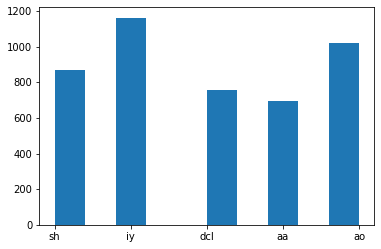

In [9]:
plt.hist(new_data['g'])

#### Checking for datatypes

In [10]:
new_data.dtypes

x.1      float64
x.2      float64
x.3      float64
x.4      float64
x.5      float64
          ...   
x.253    float64
x.254    float64
x.255    float64
x.256    float64
g         object
Length: 257, dtype: object

#### Checking for shape of the data

In [11]:
new_data.shape

(4509, 257)

Checking for any missing values

(array([  0.,   0.,   0.,   0.,   0., 257.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

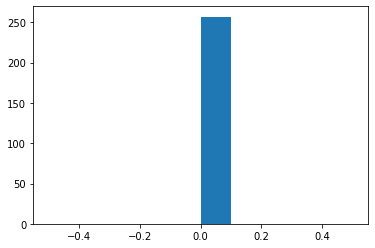

In [12]:
plt.hist(new_data.isna().sum())

### Learning LDA Models Considerations <br>
LDA assumptions:

1. Each variable is is shaped like a bell curve when plotted. <br>
2. That each attribute has the same variance, that values of each variable vary around the mean by the same amount on average.

#### 1. Checking for distribution of data.

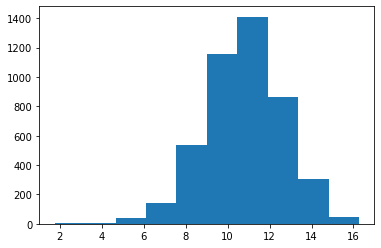

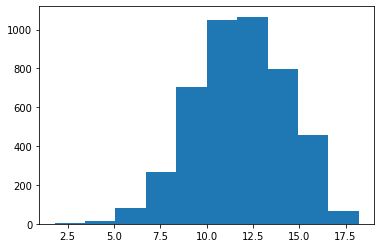

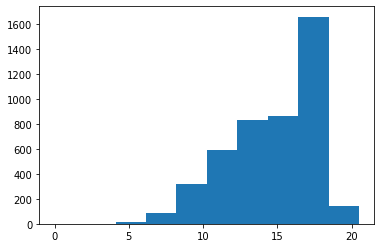

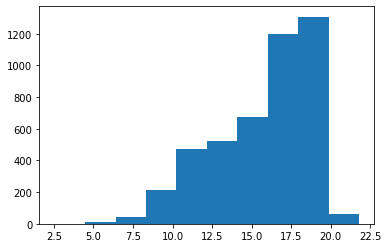

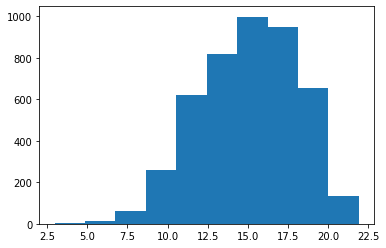

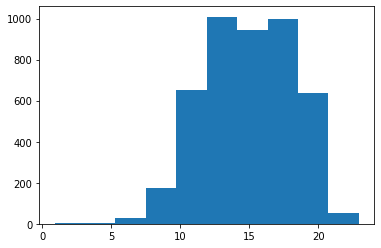

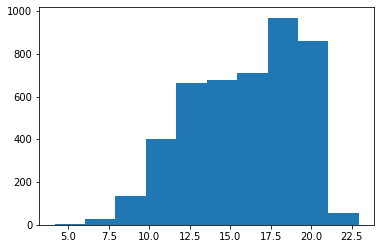

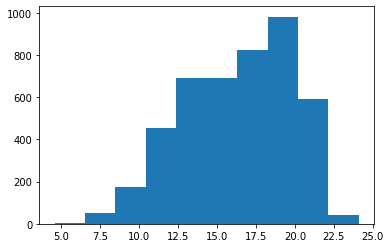

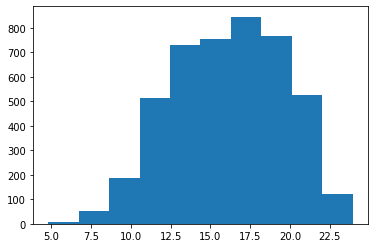

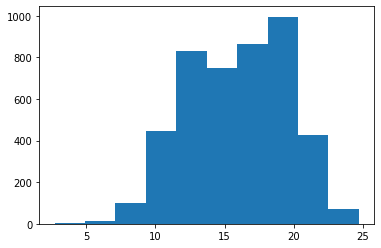

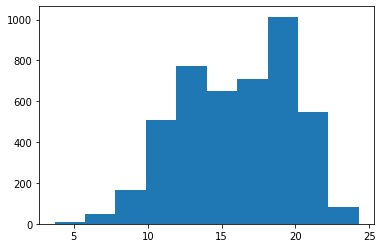

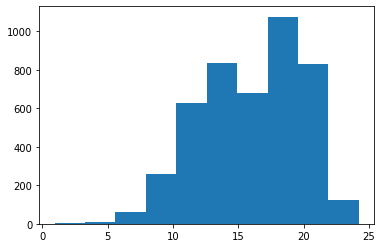

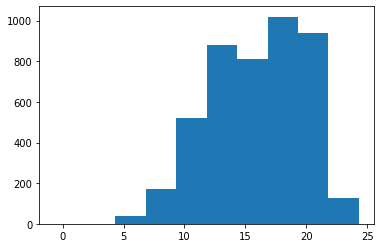

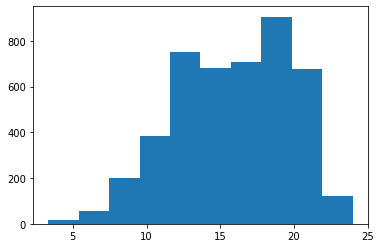

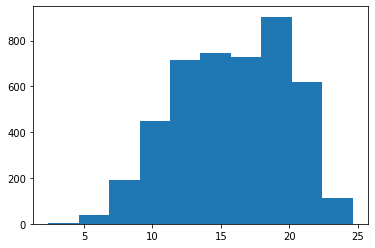

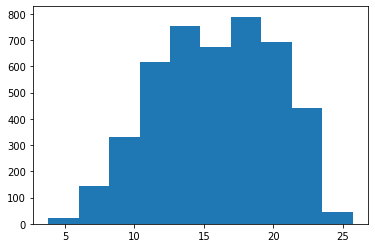

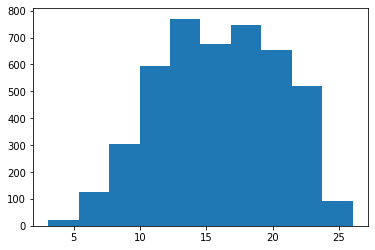

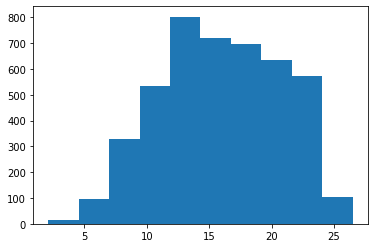

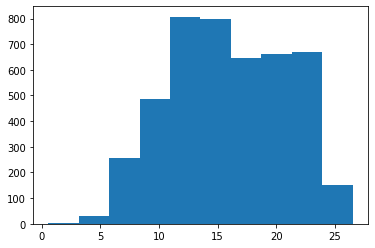

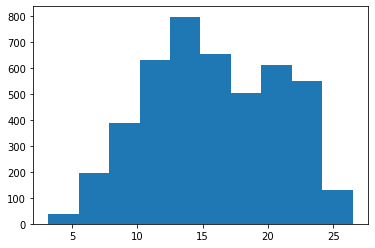

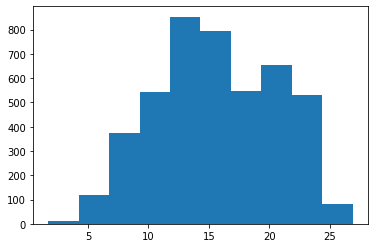

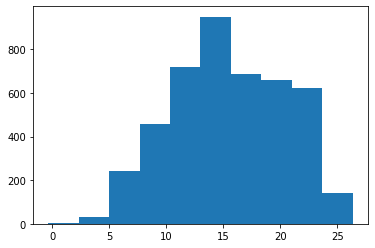

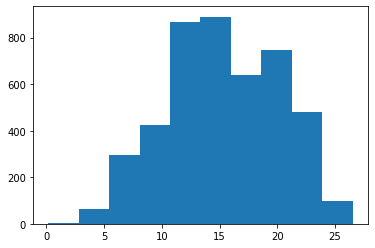

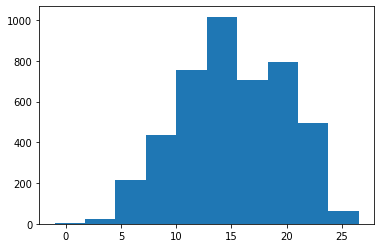

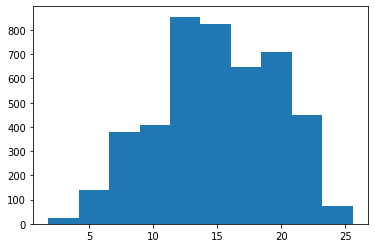

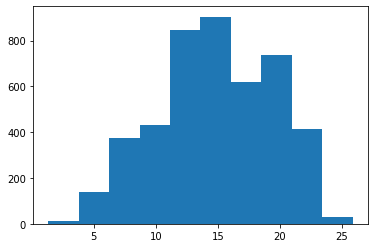

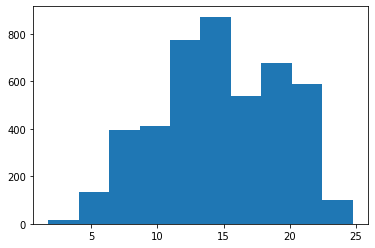

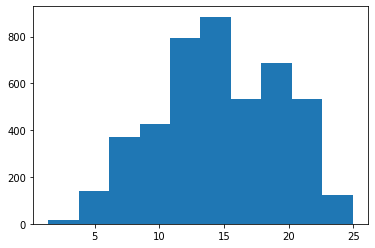

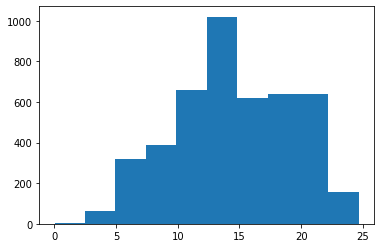

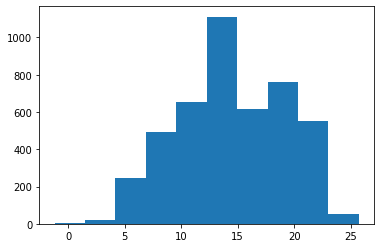

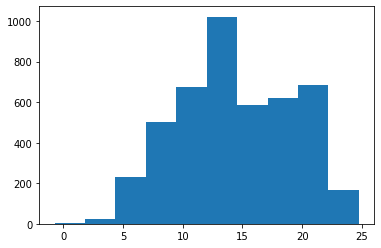

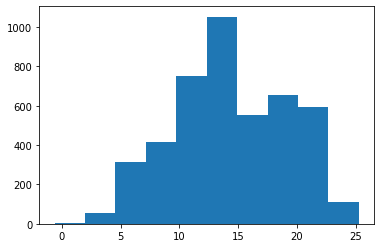

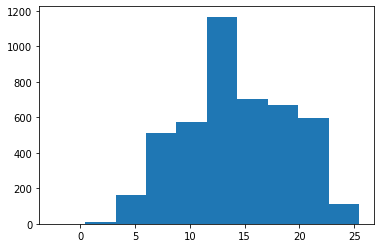

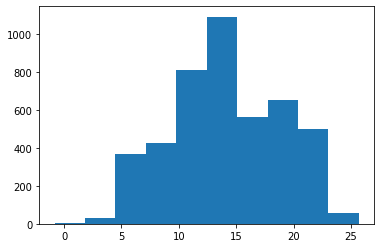

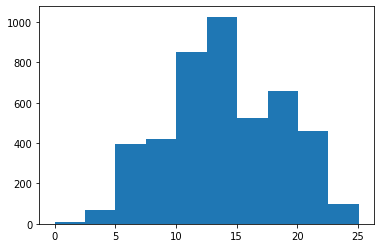

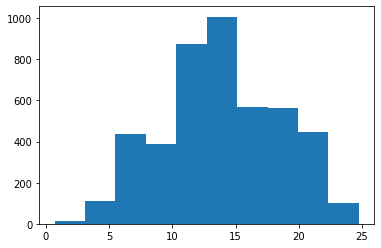

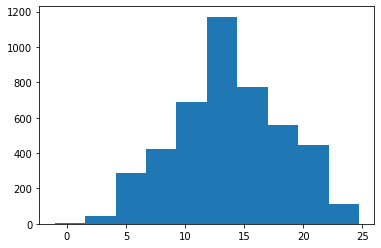

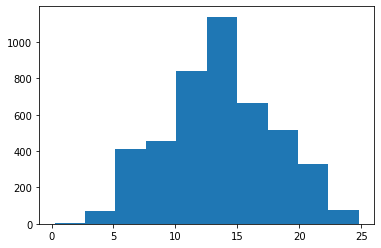

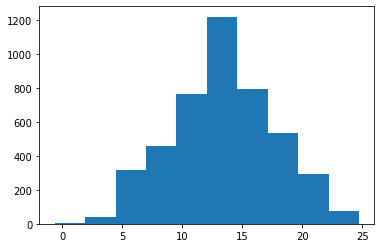

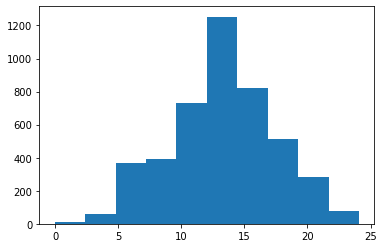

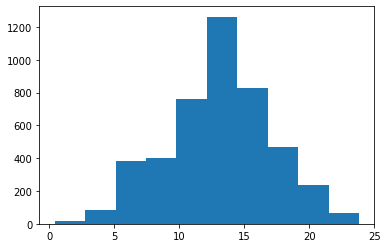

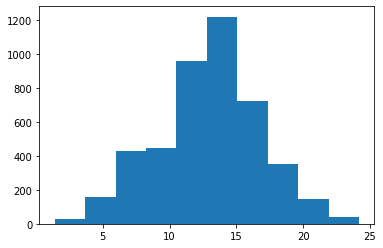

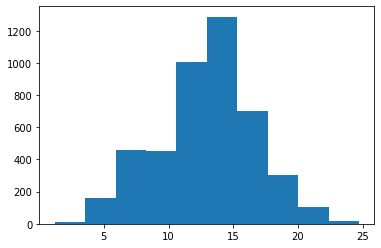

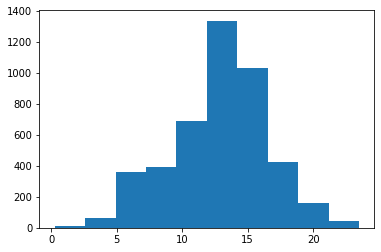

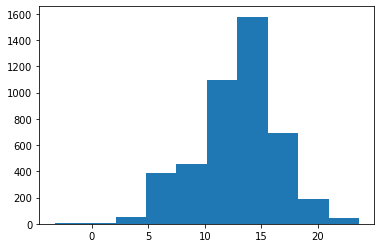

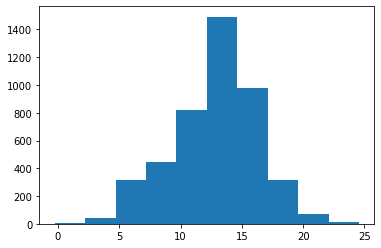

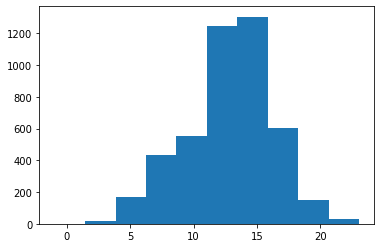

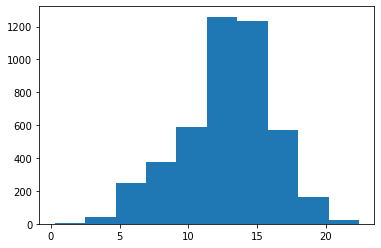

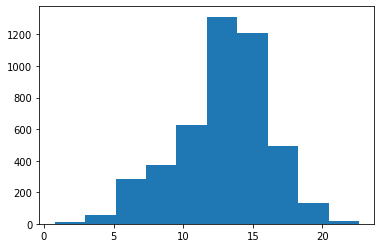

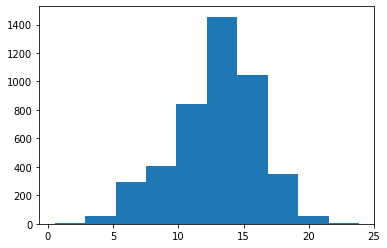

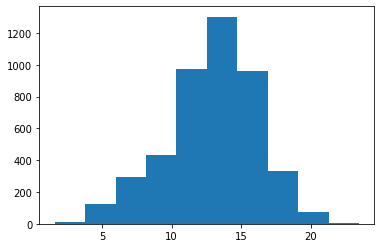

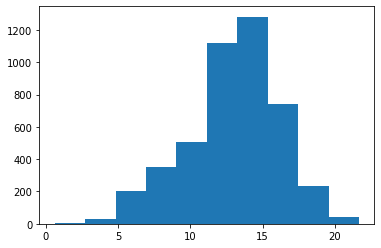

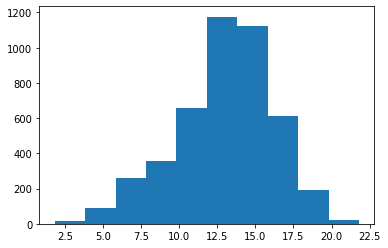

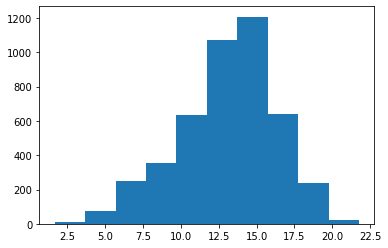

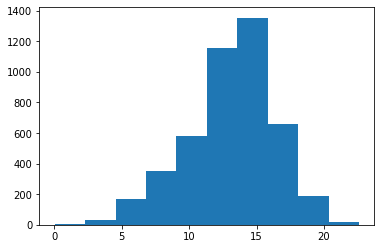

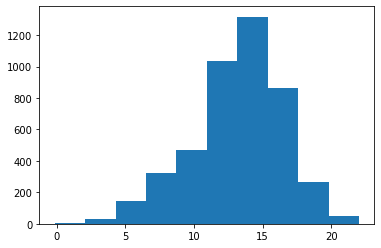

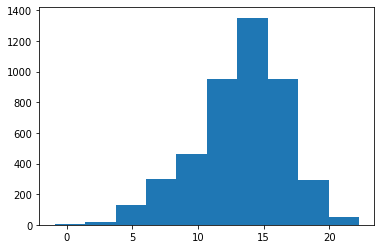

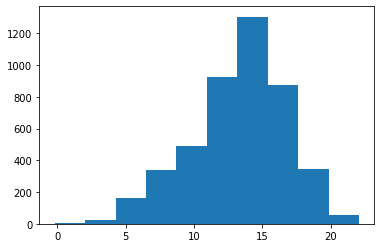

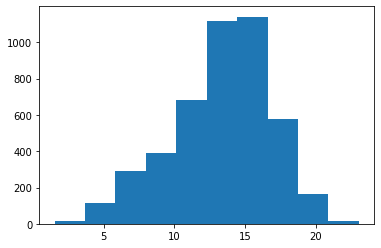

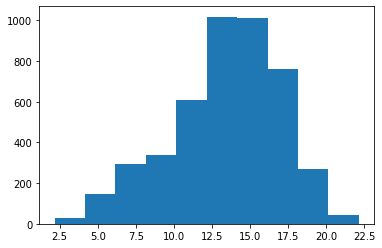

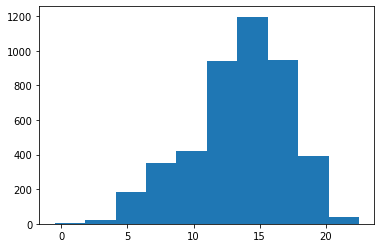

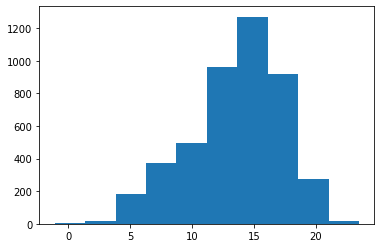

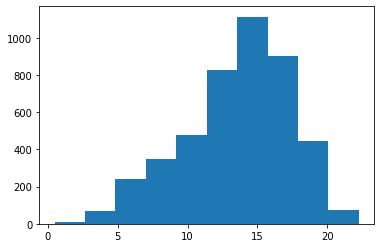

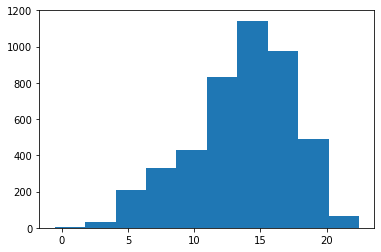

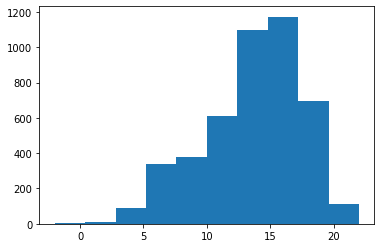

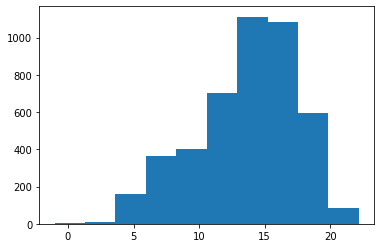

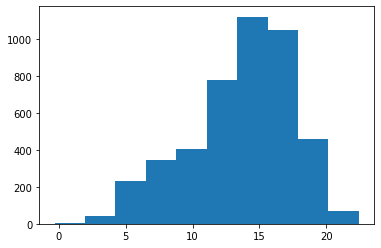

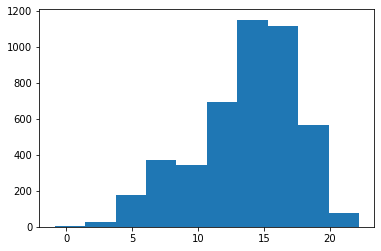

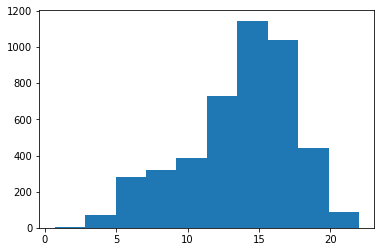

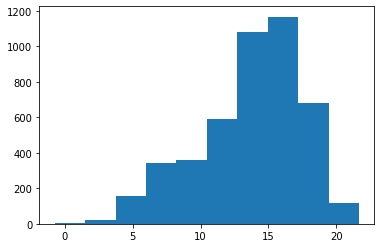

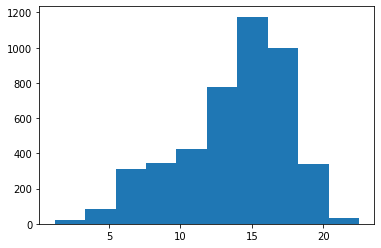

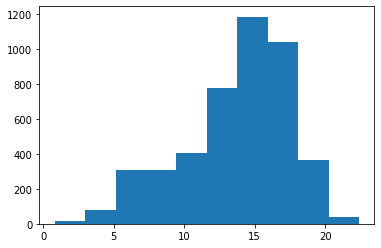

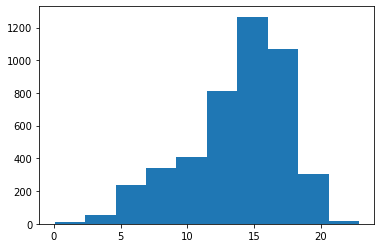

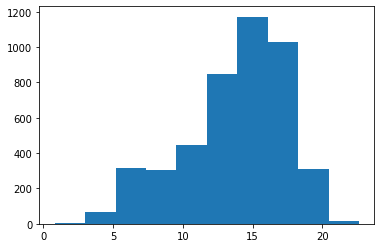

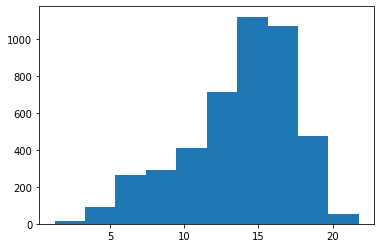

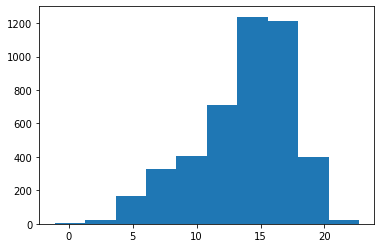

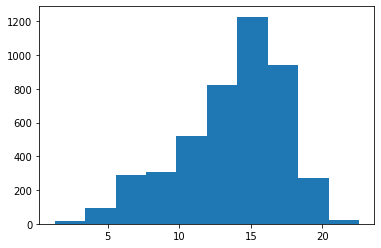

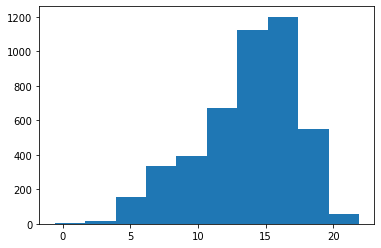

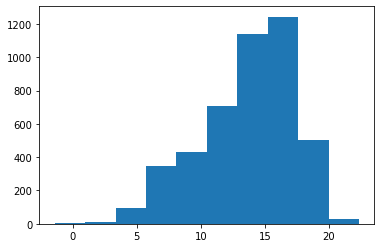

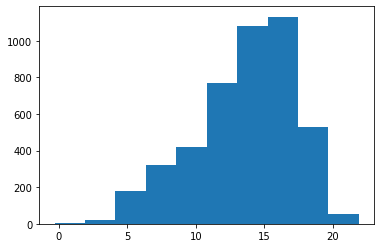

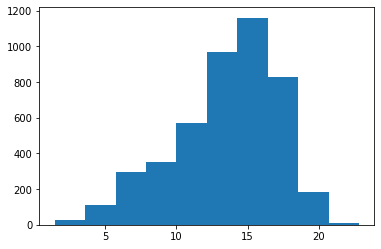

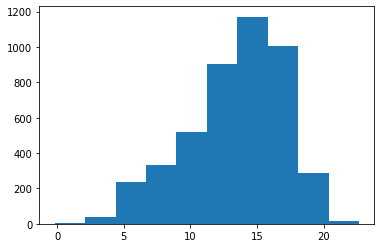

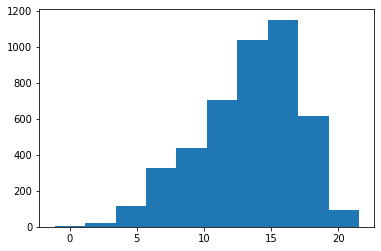

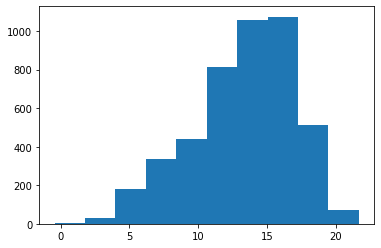

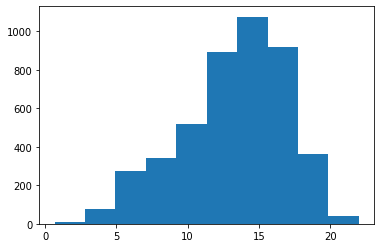

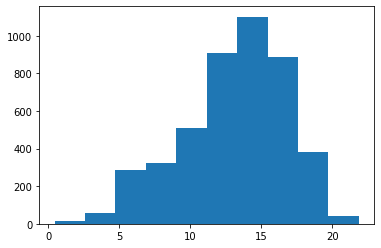

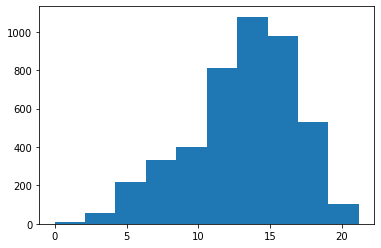

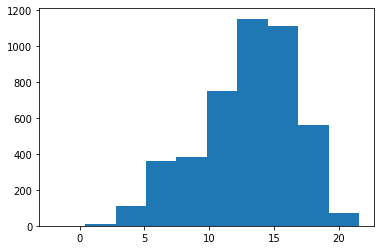

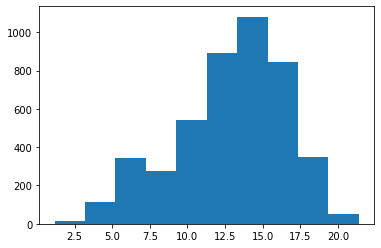

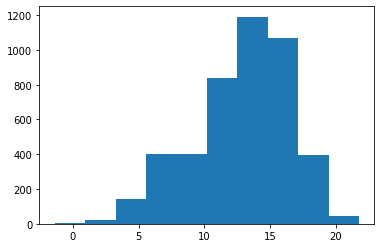

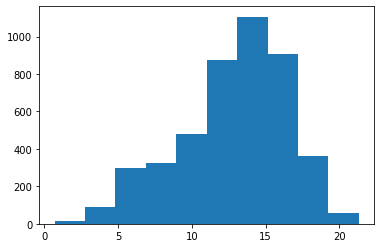

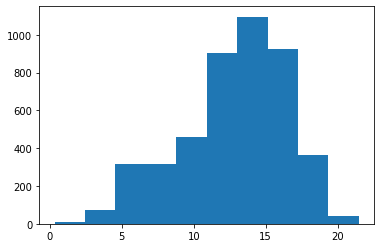

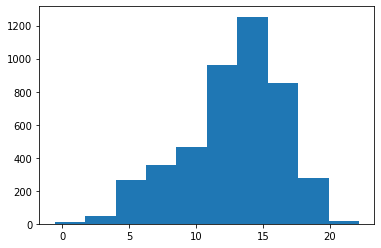

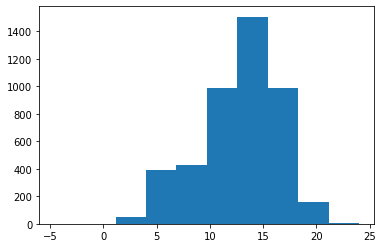

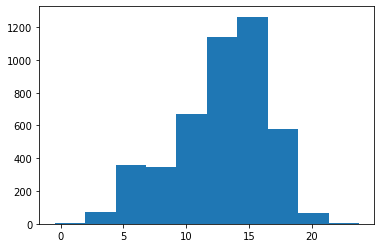

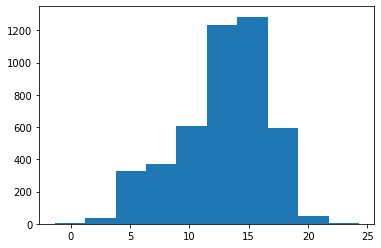

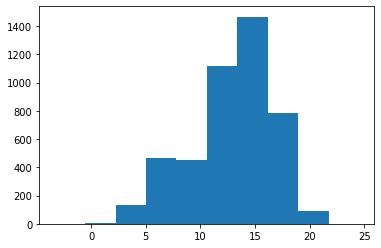

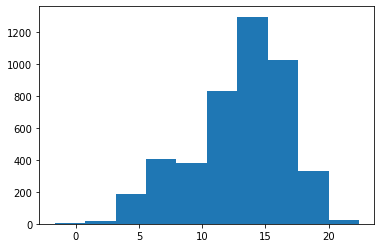

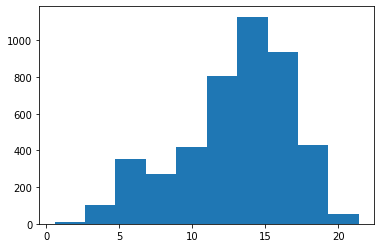

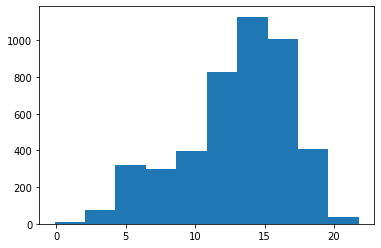

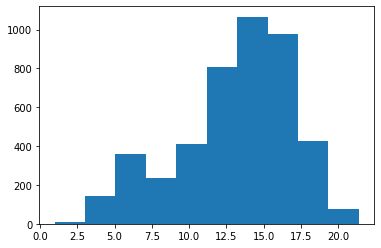

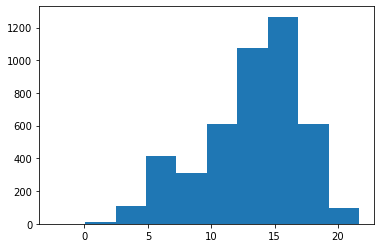

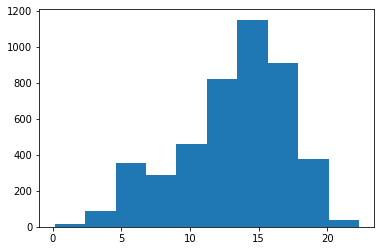

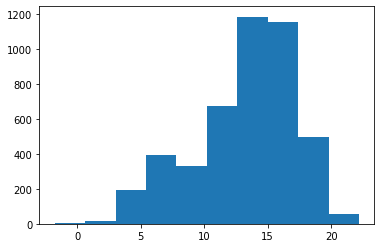

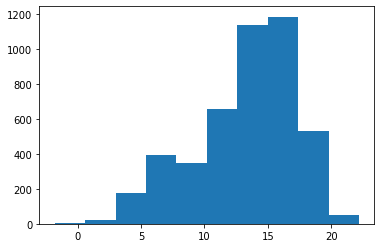

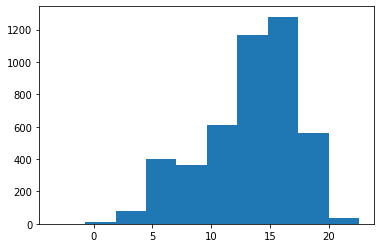

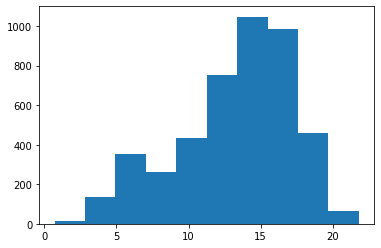

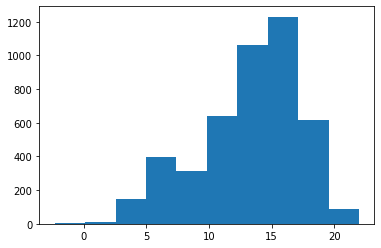

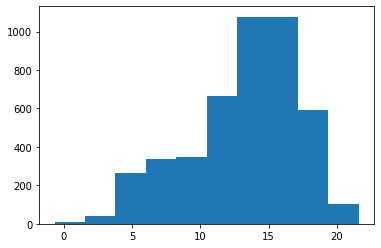

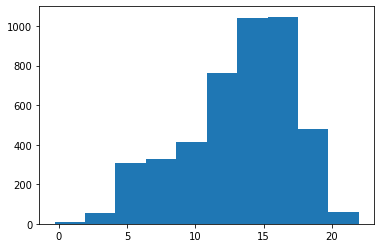

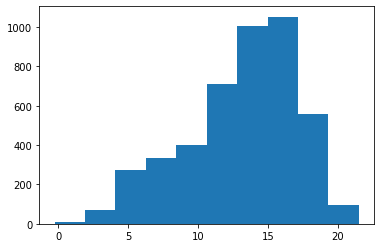

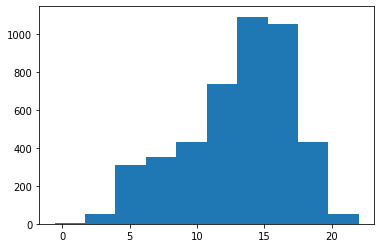

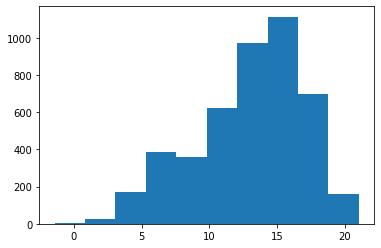

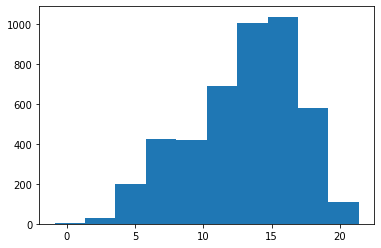

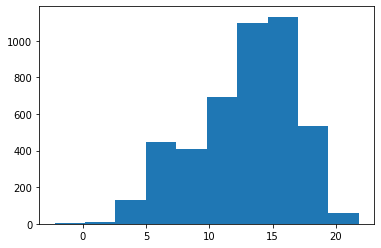

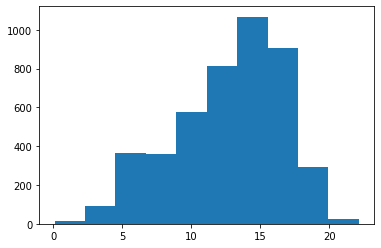

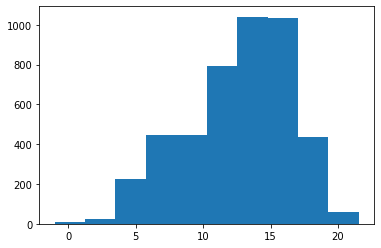

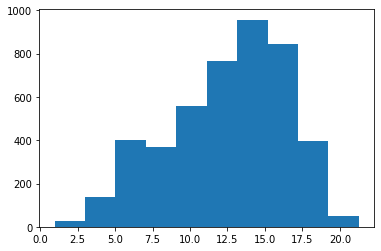

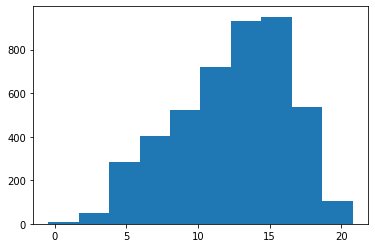

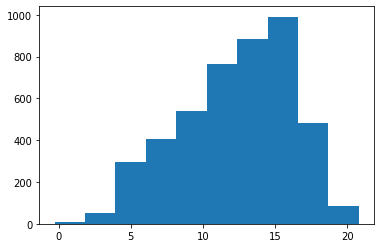

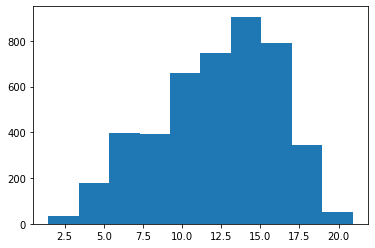

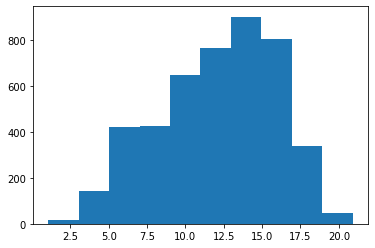

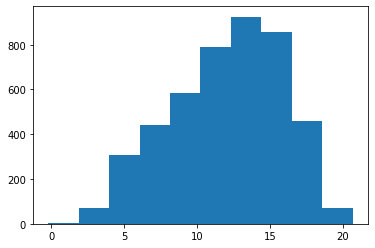

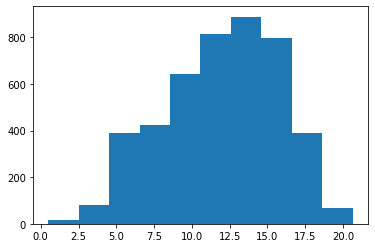

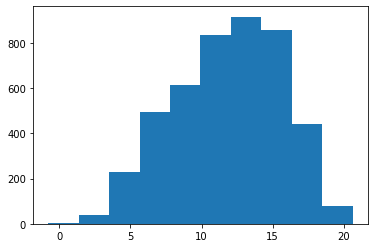

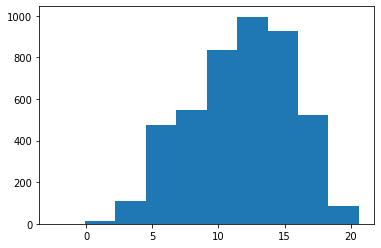

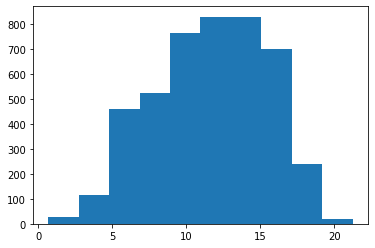

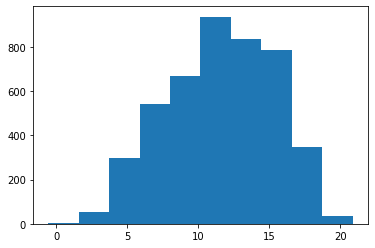

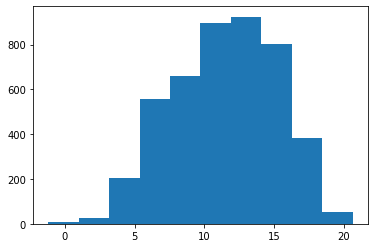

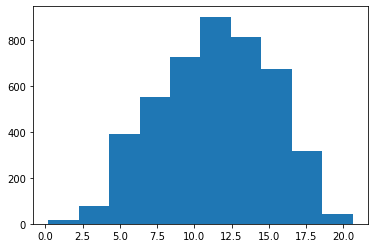

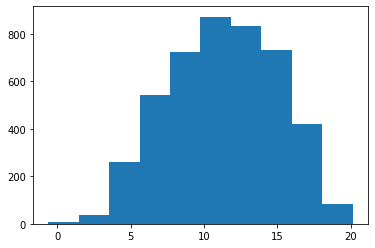

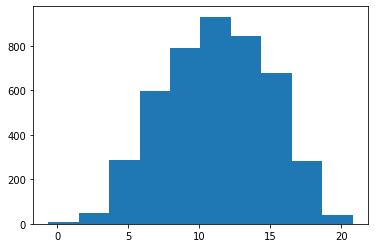

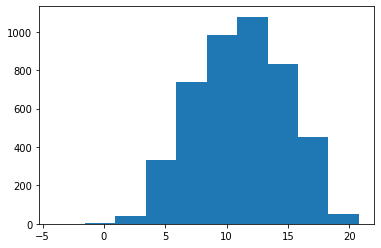

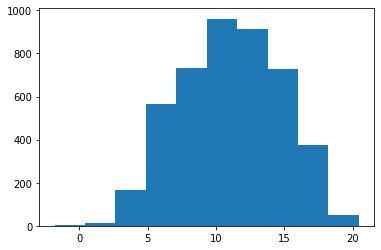

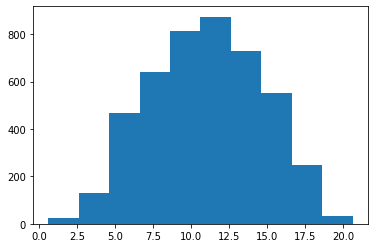

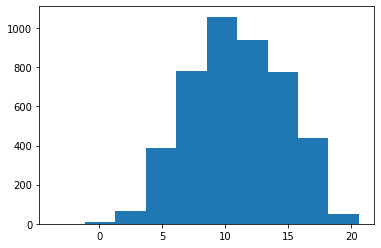

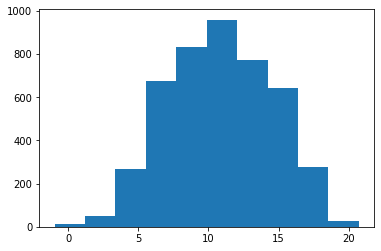

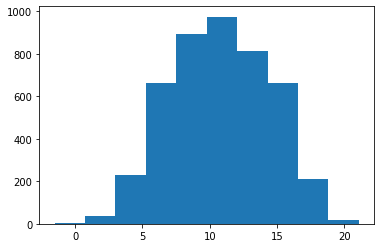

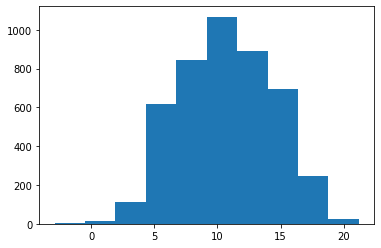

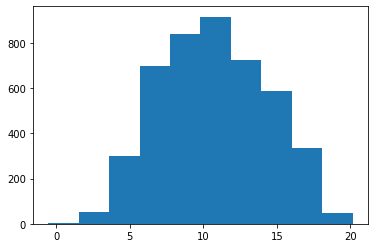

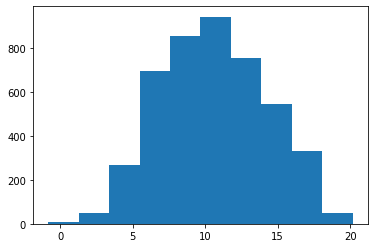

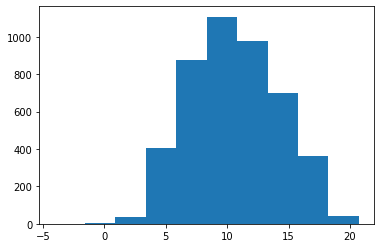

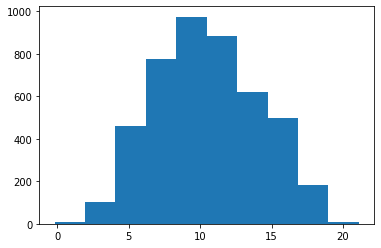

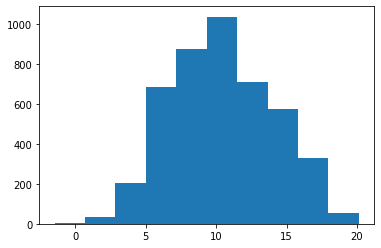

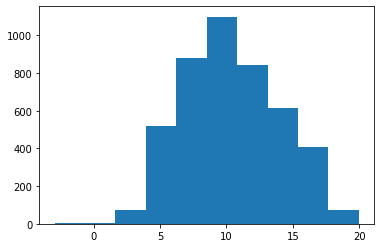

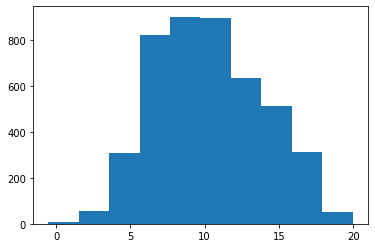

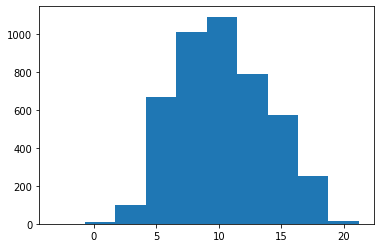

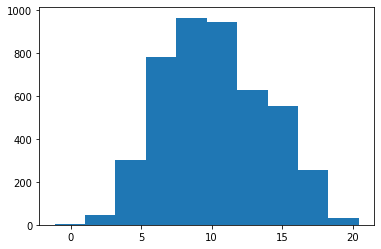

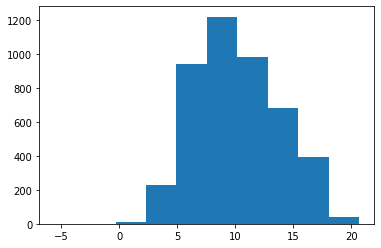

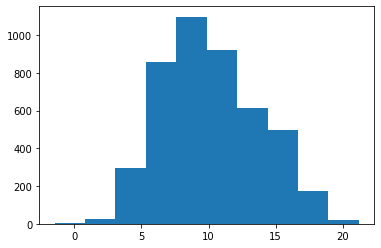

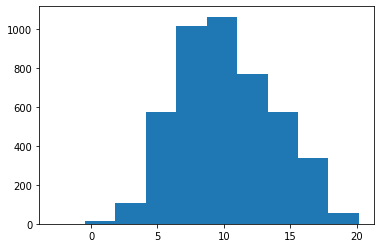

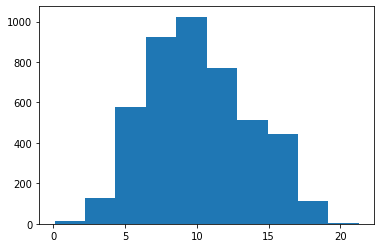

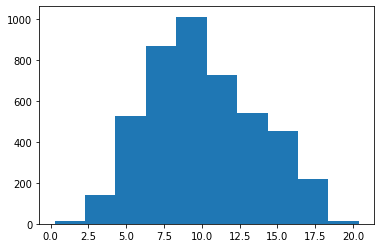

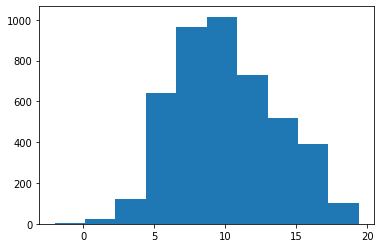

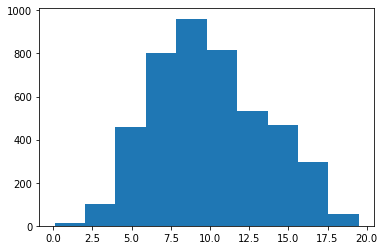

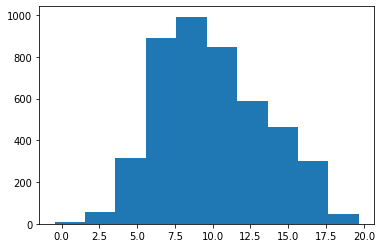

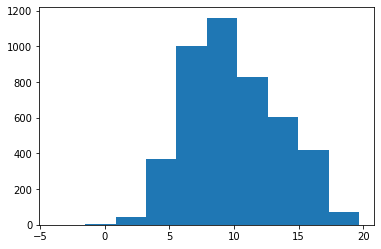

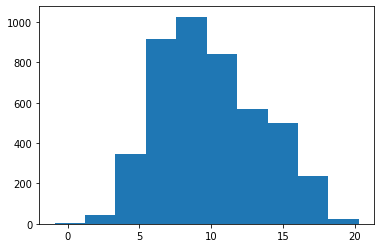

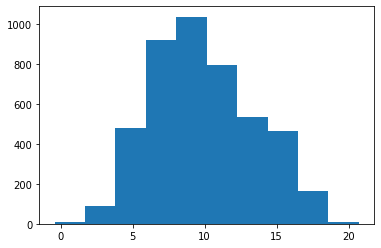

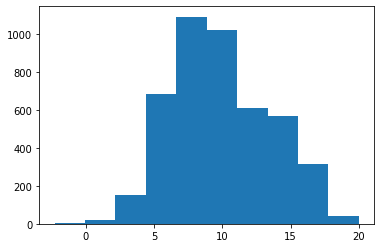

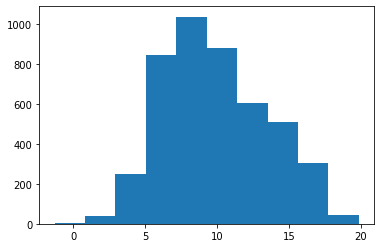

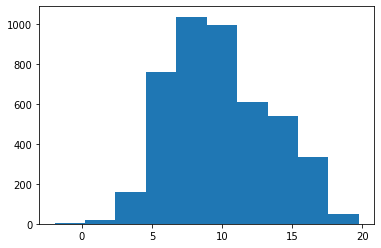

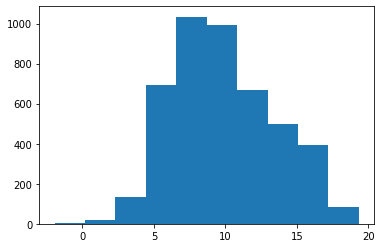

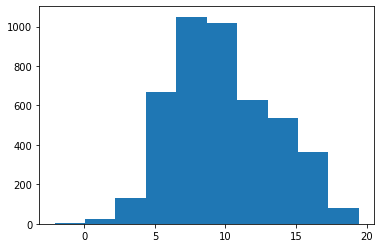

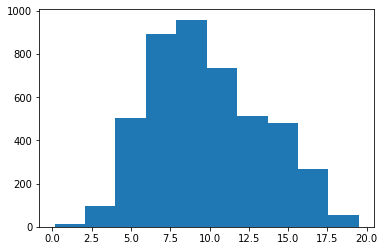

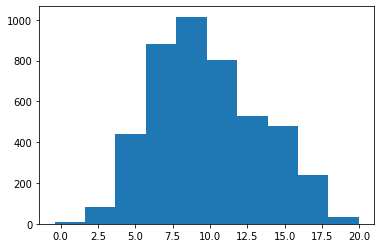

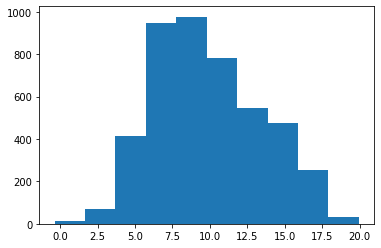

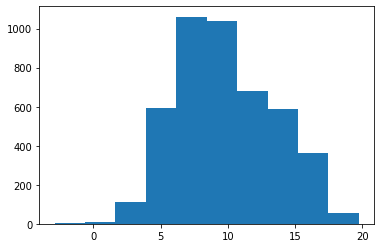

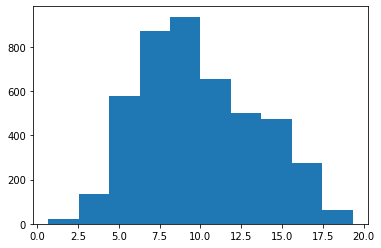

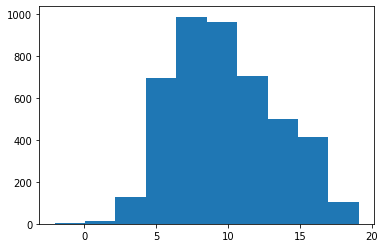

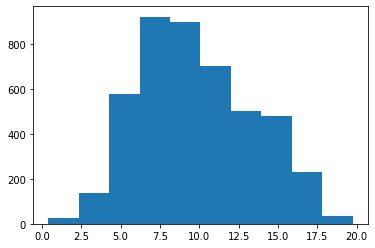

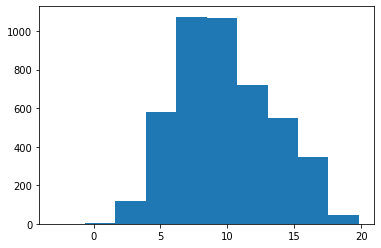

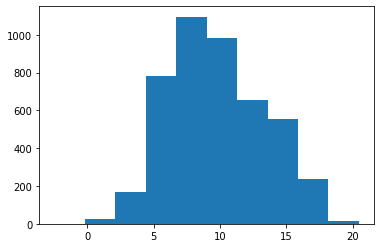

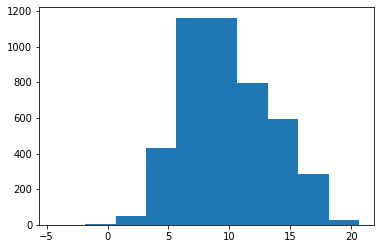

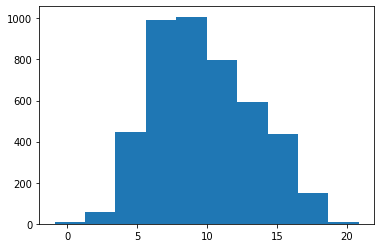

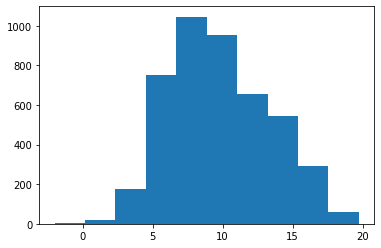

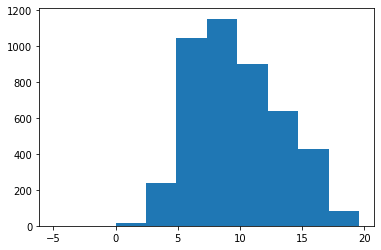

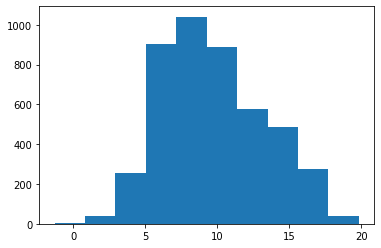

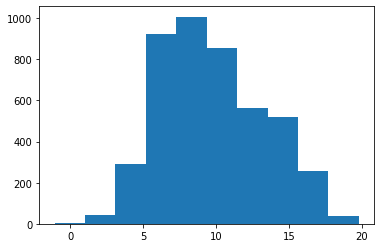

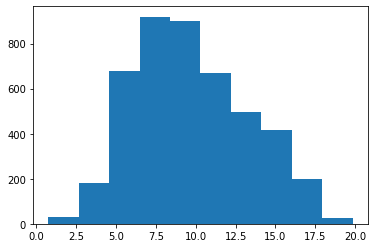

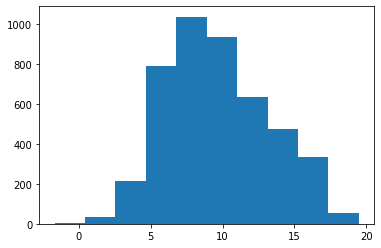

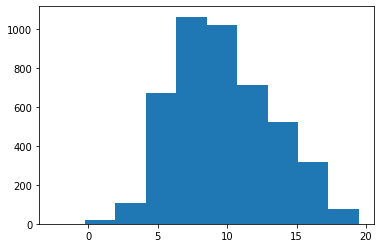

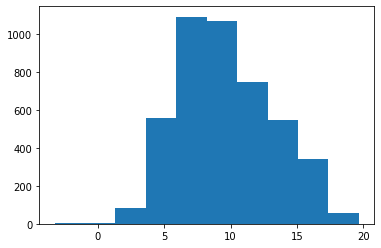

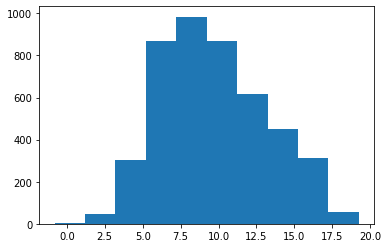

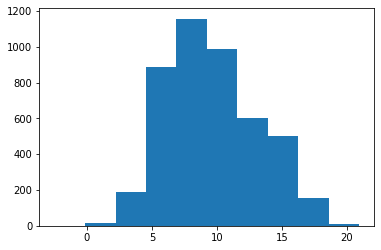

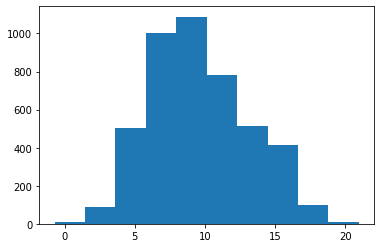

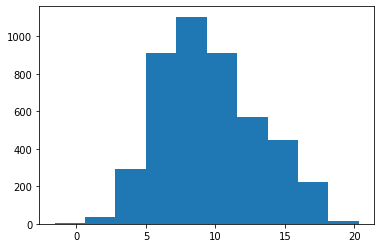

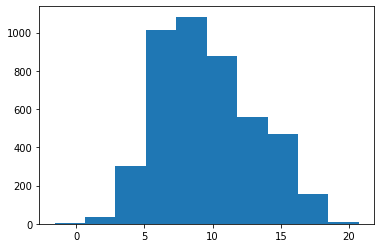

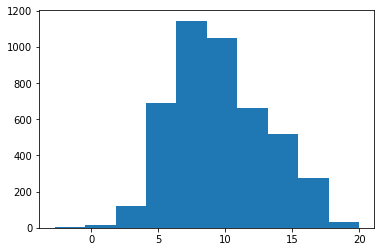

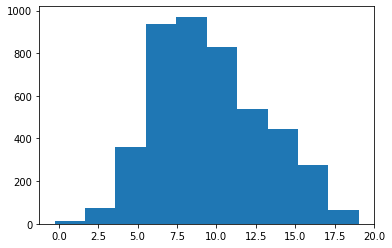

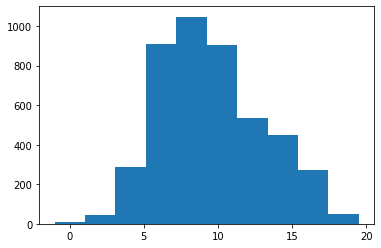

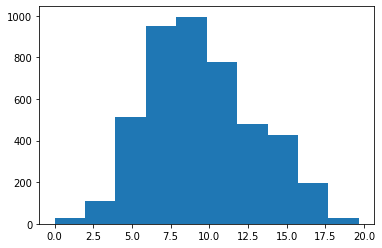

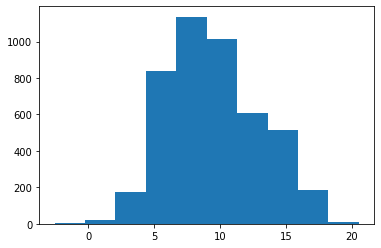

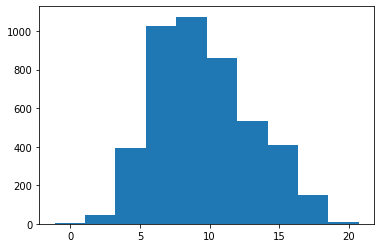

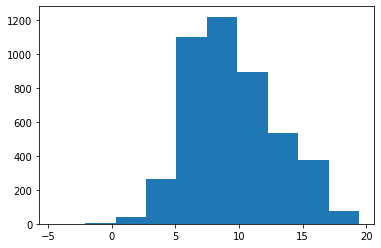

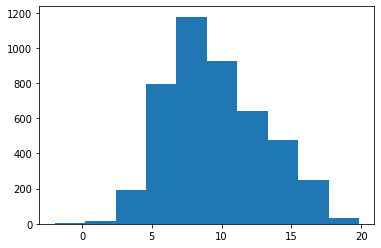

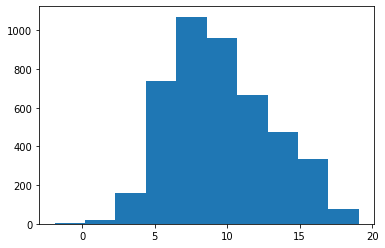

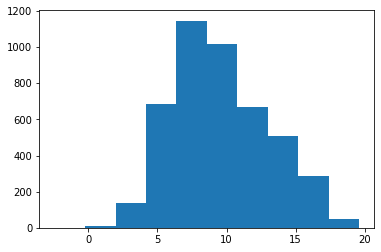

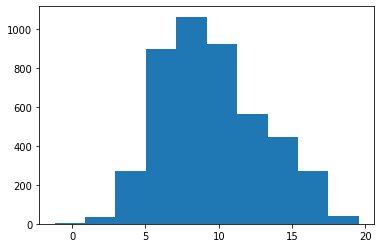

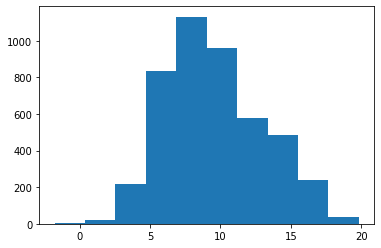

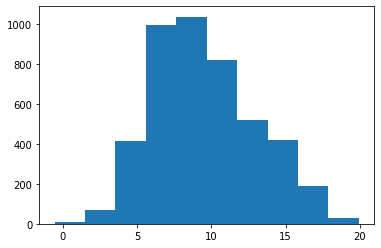

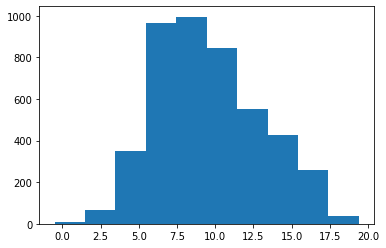

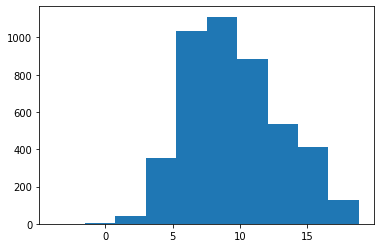

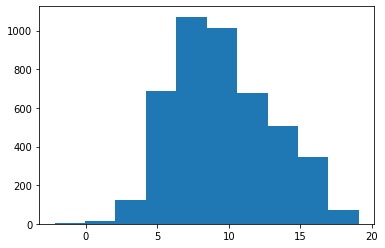

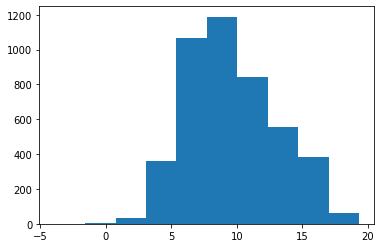

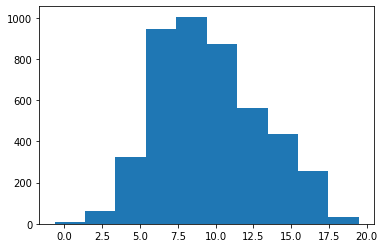

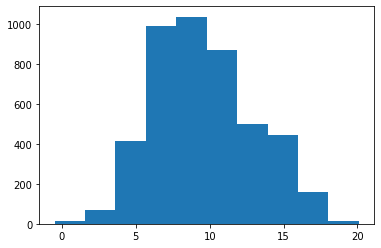

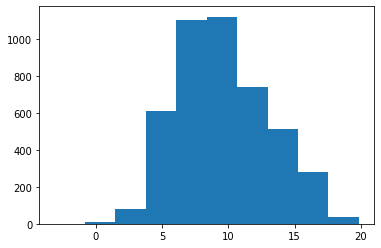

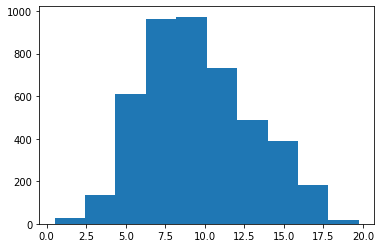

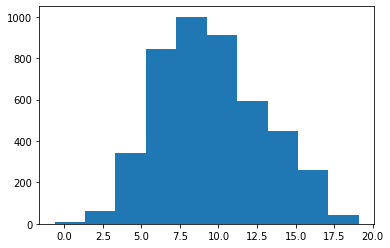

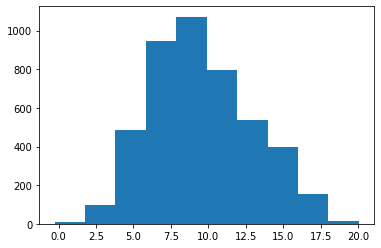

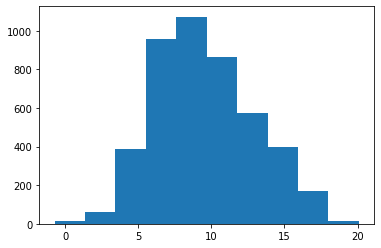

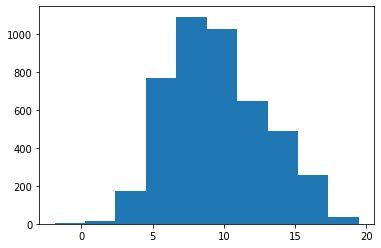

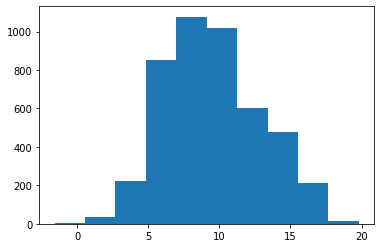

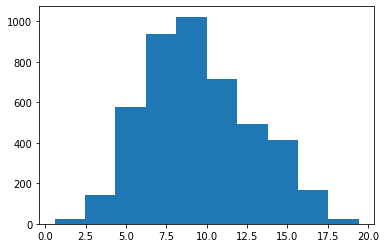

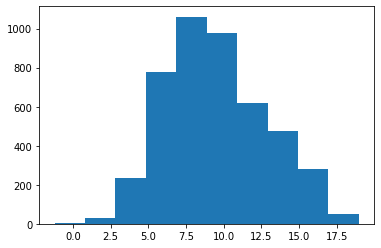

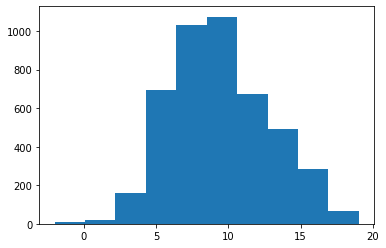

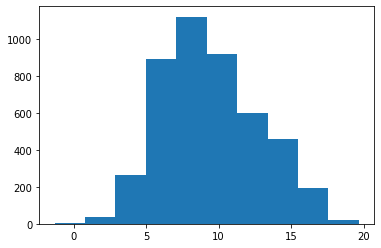

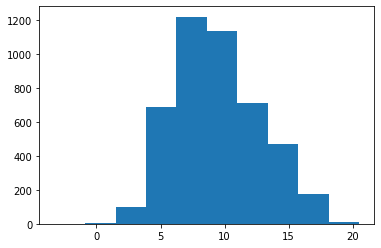

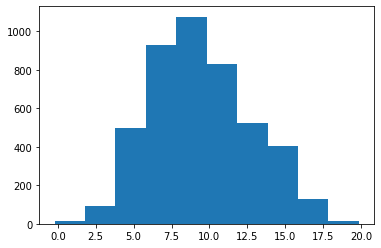

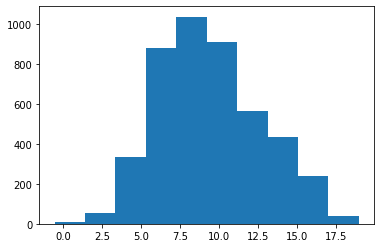

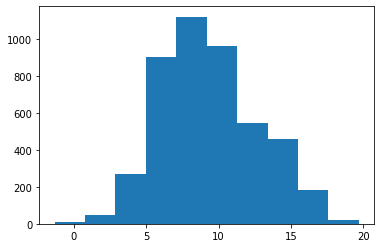

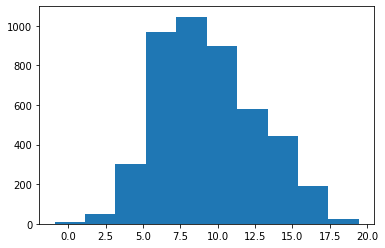

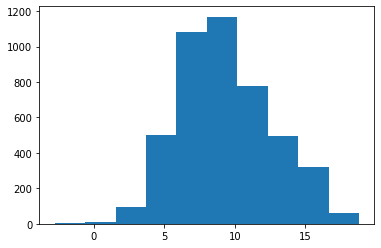

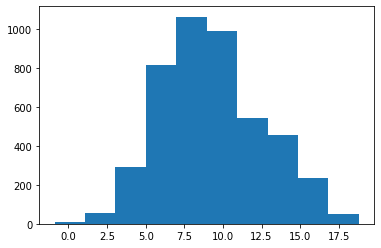

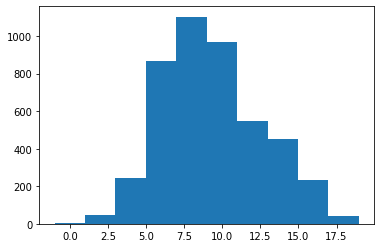

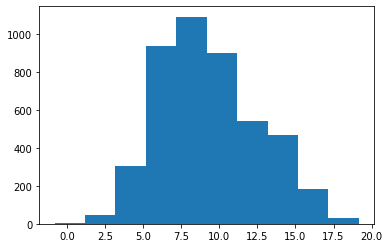

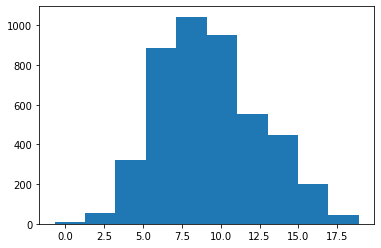

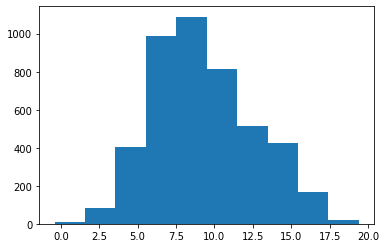

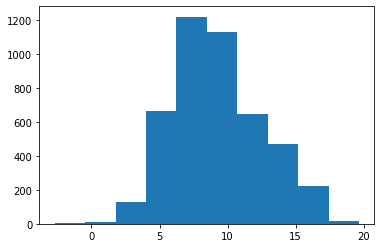

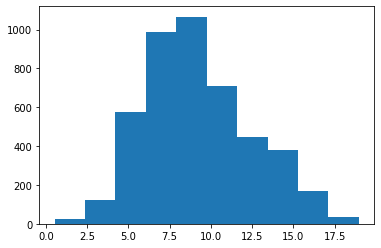

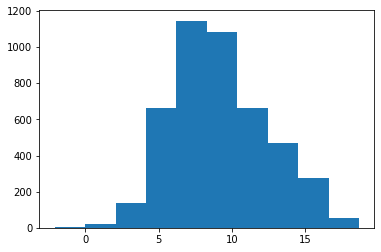

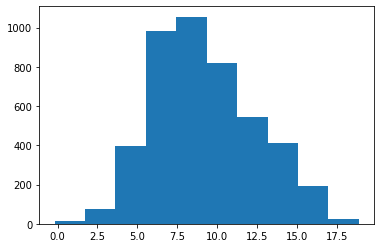

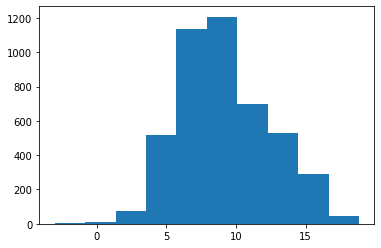

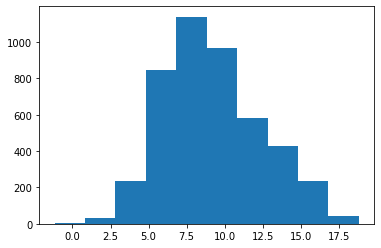

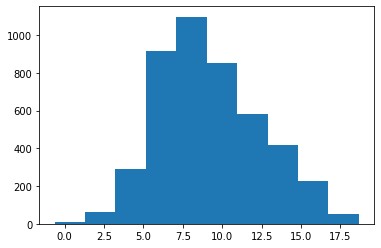

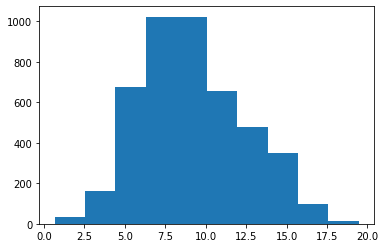

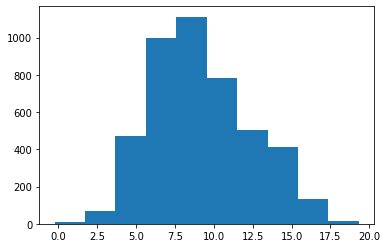

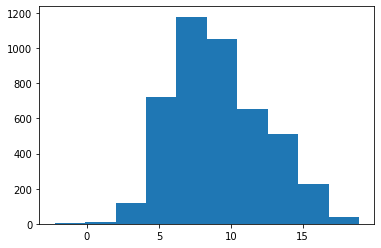

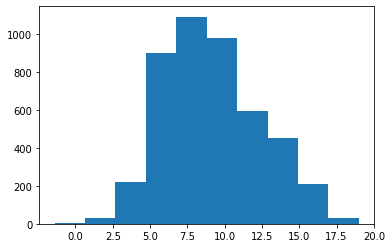

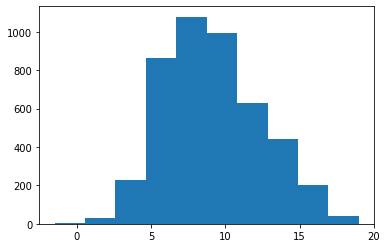

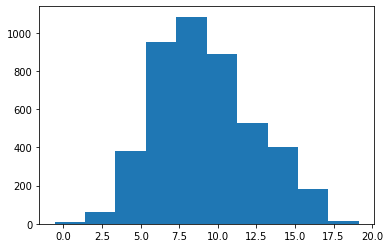

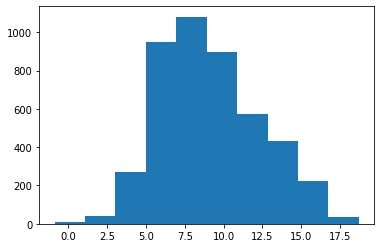

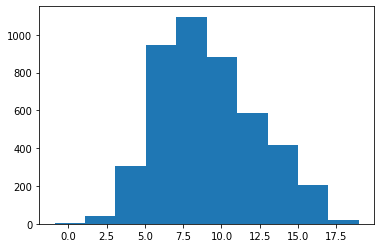

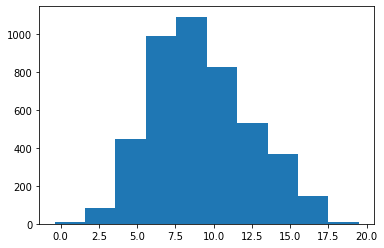

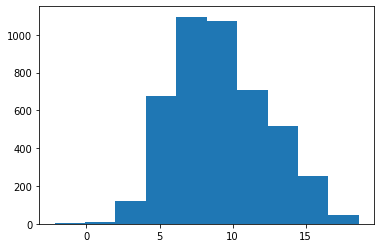

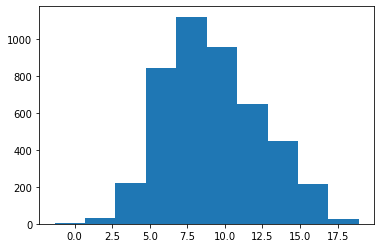

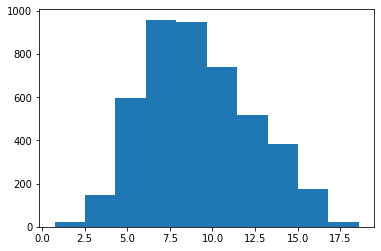

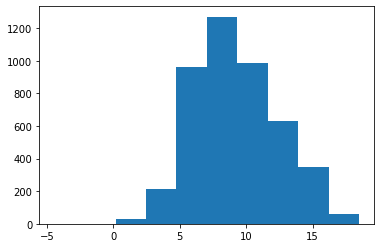

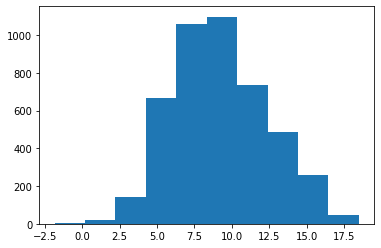

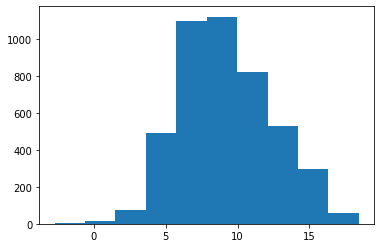

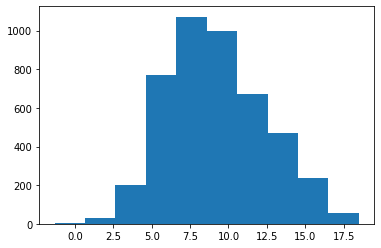

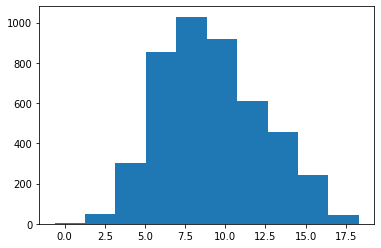

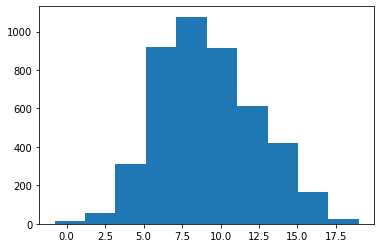

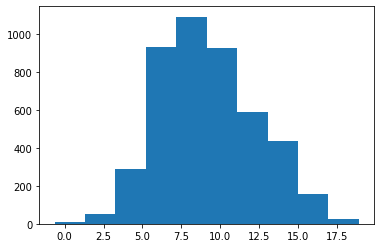

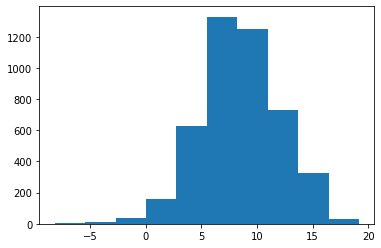

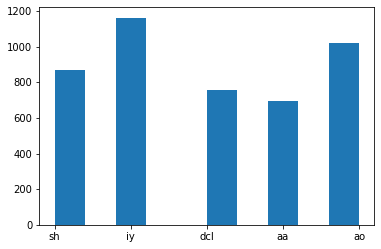

In [13]:
for i in new_data.columns:
  plt.hist(new_data[i])
  plt.show()

#### 2. Checking for the variance against each variable

(array([  1.,   1.,   4.,  74., 104.,  46.,   4.,   3.,   9.,  10.]),
 array([ 3.35798473,  5.49976189,  7.64153904,  9.7833162 , 11.92509336,
        14.06687052, 16.20864768, 18.35042484, 20.492202  , 22.63397916,
        24.77575631]),
 <a list of 10 Patch objects>)

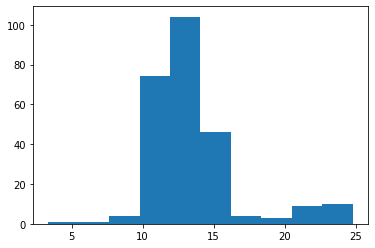

In [14]:
plt.hist(list(new_data.var()))

### Modeling -LDA CLassification

In [15]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [16]:
#splitting of data

new_data = new_data.reindex(np.random.permutation(new_data.index))

X = new_data.loc[:,~new_data.columns.isin(['g'])]
y = new_data.loc[:,new_data.columns.isin(['g'])]

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.70,test_size=0.30,random_state=101)

# define model
model = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)



In [17]:
# evaluate model
scores = cross_val_score(model,X_train , y_train, scoring='accuracy', cv=cv, n_jobs=-1)

Training Accuracy

In [18]:
# summarize result
print('Mean Accuracy: %.3f (%.3f) for Training Data' % (mean(scores), std(scores)))

Mean Accuracy: 0.929 (0.012) for Training Data


Testing Accuracy

In [19]:
scores = cross_val_score(model,X_test , y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f) for Testing Data' % (mean(scores), std(scores)))

Mean Accuracy: 0.919 (0.020) for Testing Data


## Learning LDA Models Considerations <br>
LDA assumptions:

1. Each variable is is shaped like a bell curve when plotted. <br>
2. That each attribute has the same variance, that values of each variable vary around the mean by the same amount on average.

### Does your exploratory analysis suggest that this is a good modeling technique to use for this data? <- NO

Based on our EDA analysis we can see the data does not follow the required assumptions of LDA  where every attributes should follow a gausian distribution and the variance for each attributes should be same.